# Optional Lab:  Brief Introduction to Python and Jupyter Notebooks
Welcome to the first optional lab! 
Optional labs are available to:
- provide information - like this notebook
- reinforce lecture material with hands-on examples
- provide working examples of routines used in the graded labs

## Goals
In this lab, you will:
- Get a brief introduction to Jupyter notebooks
- Take a tour of Jupyter notebooks
- Learn the difference between markdown cells and code cells
- Practice some basic python


The easiest way to become familiar with Jupyter notebooks is to take the tour available above in the Help menu:

<figure>
    <center> <img src="./images/C1W1L1_Tour.PNG"  alt='missing' width="400"  ><center/>
<figure/>

Jupyter notebooks have two types of cells that are used in this course. Cells such as this which contain documentation called `Markdown Cells`. The name is derived from the simple formatting language used in the cells. You will not be required to produce markdown cells. Its useful to understand the `cell pulldown` shown in graphic below. Occasionally, a cell will end up in the wrong mode and you may need to restore it to the right state:

<figure>
   <img src="./images/C1W1L1_Markdown.PNG"  alt='missing' width="400"  >
<figure/>

The other type of cell is the `code cell` where you will write your code:

Mean accuracy:  50.15%
Best accuracy:  90.0%
Worst accuracy: 10.0%


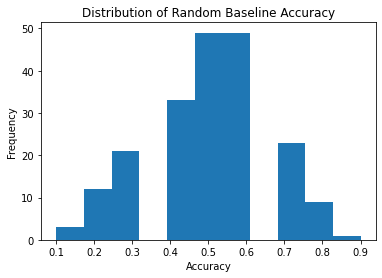

True labels:        [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
Label counts:       Counter({1: 5, 0: 5})
Majority label:     1
Majority accuracy: 50.0%


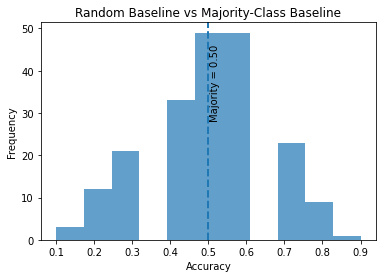

First 25 outputs: [103, 104, 6, 4, 1, 5, 7, 107, 101, 107, 104, 107, 105, 105, 5, 10, 6, 5, 9, 101, 8, 106, 8, 10, 105]

Total draws from set0: 1498
Total draws from set1: 1502
Sequential picks:      143
Random picks:          2857


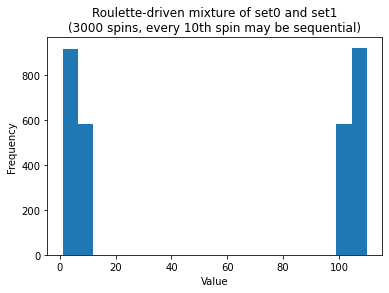

Counter({105: 173, 3: 164, 5: 157, 107: 155, 10: 153, 102: 152, 108: 151, 103: 150, 6: 150, 1: 150, 2: 150, 109: 149, 106: 147, 4: 145, 110: 145, 7: 144, 8: 144, 104: 142, 9: 141, 101: 138})
min: 1 max: 110


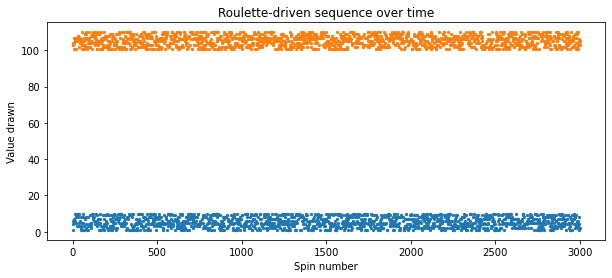

In [1]:
import random
import statistics as stats
import matplotlib.pyplot as plt

%matplotlib inline

true_labels = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]

def run_random_baseline(true_labels):
    preds = [random.randint(0, 1) for _ in true_labels]
    correct = sum(t == p for t, p in zip(true_labels, preds))
    return correct / len(true_labels)

num_runs = 200
accuracies = [run_random_baseline(true_labels) for _ in range(num_runs)]

print(f"Mean accuracy:  {stats.mean(accuracies) * 100:.2f}%")
print(f"Best accuracy:  {max(accuracies) * 100:.1f}%")
print(f"Worst accuracy: {min(accuracies) * 100:.1f}%")

plt.hist(accuracies, bins=11)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Distribution of Random Baseline Accuracy")
plt.show()

from collections import Counter

# Majority-class baseline: always predict the most frequent label
counts = Counter(true_labels)
majority_label, majority_count = counts.most_common(1)[0]
majority_acc = majority_count / len(true_labels)

print("True labels:       ", true_labels)
print("Label counts:      ", counts)
print("Majority label:    ", majority_label)
print(f"Majority accuracy: {majority_acc * 100:.1f}%")

import matplotlib.pyplot as plt

plt.hist(accuracies, bins=11, alpha=0.7)
plt.axvline(majority_acc, linestyle="--", linewidth=2)

plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Random Baseline vs Majority-Class Baseline")
plt.text(majority_acc + 0.005, max(plt.gca().get_ylim()) * 0.9,
         f"Majority = {majority_acc:.2f}",
         rotation=90, va="top")

plt.show()

import random
import matplotlib.pyplot as plt

# ---------------------------------------------
# Two underlying "distributions" / sets
# 0 → baseline set, 1 → second set
# (You can swap these for anything you want,
# e.g. set0 = accuracies, set1 = [1-a for a in accuracies])
# ---------------------------------------------
set0 = list(range(1, 11))                  # 1,2,...,10
set1 = [x + 100 for x in range(1, 11)]     # 101,102,...,110

# European roulette-ish probability for 1 vs 0
# 18 red / 37 total ≈ 0.486, same for black.
P_ONE = 18 / 37.0  # chance of getting a "1"

def spin_zero_one(p=P_ONE):
    """Return 1 with probability p, else 0."""
    return 1 if random.random() < p else 0

def generate_roulette_sequence(num_rolls=3000):
    """
    For each roll:
      - roulette decides 0 or 1 → choose set0 or set1
      - normally we pick a RANDOM element from that set
      - every 10th roll, roulette decides:
            0 → RANDOM pick
            1 → SEQUENTIAL pick
        Sequential picks walk through each set in order and
        remember where we left off for that set.
    """
    seq_index = {0: 0, 1: 0}   # where we are in each set for sequential picks
    outputs = []               # final mixed sequence
    meta = []                  # (set_id, mode) for each roll

    for t in range(1, num_rolls + 1):
        # 1) Roulette chooses which set (0 or 1)
        set_id = spin_zero_one()         # 0 → set0, 1 → set1
        current_set = set0 if set_id == 0 else set1

        # 2) Decide whether this roll is random or sequential
        if t % 10 == 0:
            # every 10th roll, roulette decides the mode
            mode_is_seq = (spin_zero_one() == 1)  # 1 → sequential, 0 → random
        else:
            # all other rolls: always random
            mode_is_seq = False

        # 3) Pick value according to mode
        if mode_is_seq:
            idx = seq_index[set_id]
            value = current_set[idx]
            # advance pointer for this set (wrap around if needed)
            seq_index[set_id] = (seq_index[set_id] + 1) % len(current_set)
            mode = "seq"
        else:
            idx = random.randrange(len(current_set))
            value = current_set[idx]
            mode = "rand"

        outputs.append(value)
        meta.append((set_id, mode))

    return outputs, meta


outputs, meta = generate_roulette_sequence(num_rolls=3000)

# Quick stats
total_set0 = sum(1 for s, m in meta if s == 0)
total_set1 = sum(1 for s, m in meta if s == 1)
seq_picks  = sum(1 for s, m in meta if m == "seq")
rand_picks = sum(1 for s, m in meta if m == "rand")

print("First 25 outputs:", outputs[:25])
print(f"\nTotal draws from set0: {total_set0}")
print(f"Total draws from set1: {total_set1}")
print(f"Sequential picks:      {seq_picks}")
print(f"Random picks:          {rand_picks}")

# Visualize what this "truly random" mixed set looks like
plt.hist(outputs, bins=20)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Roulette-driven mixture of set0 and set1\n(3000 spins, every 10th spin may be sequential)")
plt.show()

from collections import Counter

counts = Counter(outputs)
print(counts)           # how often each of 1–10 and 101–110 appears
print("min:", min(outputs), "max:", max(outputs))

import matplotlib.pyplot as plt


indices = list(range(1, len(outputs) + 1))

# Split points by set
idx0 = [i for i, (s, m) in enumerate(meta) if s == 0]
val0 = [outputs[i] for i in idx0]

idx1 = [i for i, (s, m) in enumerate(meta) if s == 1]
val1 = [outputs[i] for i in idx1]

plt.figure(figsize=(10, 4))
plt.scatter([i+1 for i in idx0], val0, s=5, label="set0 (low numbers)")
plt.scatter([i+1 for i in idx1], val1, s=5, label="set1 (high numbers)")

plt.xlabel("Spin number")
plt.ylabel("Value drawn")
plt.title("Roulette-driven sequence over time")
plt;



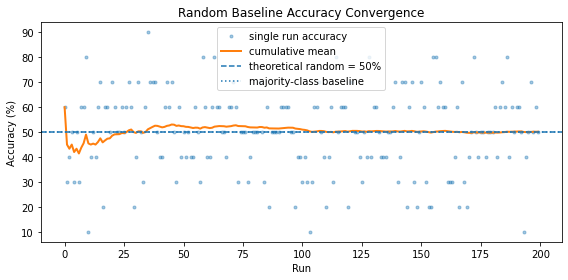

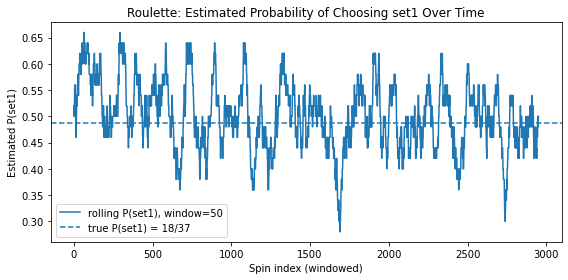

In [2]:
import matplotlib.pyplot as plt

# -------------------------------
# 1) Random baseline convergence
# -------------------------------
# Convert accuracies to percentages
acc_percent = [a * 100 for a in accuracies]

# Cumulative mean accuracy over time (no numpy needed)
cum_mean = []
running_total = 0.0
for i, x in enumerate(acc_percent, start=1):
    running_total += x
    cum_mean.append(running_total / i)

plt.figure(figsize=(8, 4))
plt.plot(acc_percent, ".", alpha=0.4, label="single run accuracy")
plt.plot(cum_mean, "-", linewidth=2, label="cumulative mean")
plt.axhline(50, linestyle="--", linewidth=1.5, label="theoretical random = 50%")
plt.axhline(majority_acc * 100, linestyle=":", linewidth=1.5,
            label="majority-class baseline")

plt.xlabel("Run")
plt.ylabel("Accuracy (%)")
plt.title("Random Baseline Accuracy Convergence")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------------------
# 2) Roulette: rolling probability of set1
# -----------------------------------------
# meta contains (set_id, mode) from your generator
is_set1 = [1 if s == 1 else 0 for (s, m) in meta]

window = 50  # rolling window size (spins)
rolling_p = []
for i in range(len(is_set1) - window + 1):
    chunk = is_set1[i:i + window]
    rolling_p.append(sum(chunk) / window)

plt.figure(figsize=(8, 4))
plt.plot(rolling_p, linewidth=1.5, label=f"rolling P(set1), window={window}")
plt.axhline(P_ONE, linestyle="--", linewidth=1.5, label="true P(set1) = 18/37")

plt.xlabel("Spin index (windowed)")
plt.ylabel("Estimated P(set1)")
plt.title("Roulette: Estimated Probability of Choosing set1 Over Time")
plt.legend()
plt.tight_layout()
plt.show()




n1 (avg random accuracy %): 50.15
n2 (majority accuracy %):   50.00
n3 (P(spin from set1) %):   50.07

Vector in 0–1 space: (0.5015, 0.5, 0.5006666666666667)
Length (Euclidean norm): 0.867


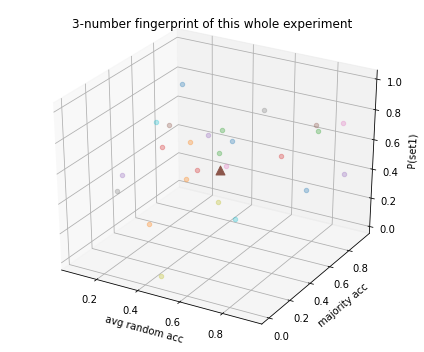

In [4]:
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D projection

# ---------------------------------------------------
# 1. Collapse EVERYTHING into three summary numbers
# ---------------------------------------------------

# n1: average random-baseline accuracy (0–100 %)
n1 = stats.mean(accuracies) * 100

# n2: majority-class baseline accuracy (0–100 %)
n2 = majority_acc * 100

# n3: how often roulette chose set1 (0–100 %)
total_spins = len(meta)
num_set1 = sum(1 for s, m in meta if s == 1)
n3 = (num_set1 / total_spins) * 100

print(f"n1 (avg random accuracy %): {n1:.2f}")
print(f"n2 (majority accuracy %):   {n2:.2f}")
print(f"n3 (P(spin from set1) %):   {n3:.2f}")

# ---------------------------------------------------
# 2. Treat [n1, n2, n3] as a vector and do something
# ---------------------------------------------------

# Work in 0–1 space for the norm
v1, v2, v3 = n1 / 100, n2 / 100, n3 / 100
vec = (v1, v2, v3)
norm = math.sqrt(v1**2 + v2**2 + v3**2)

print(f"\nVector in 0–1 space: {vec}")
print(f"Length (Euclidean norm): {norm:.3f}")

# ---------------------------------------------------
# 3. Plot this as a 3D point vs some random ones
# ---------------------------------------------------

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")

# Some random comparison points
for _ in range(25):
    r1 = random.random()
    r2 = random.random()
    r3 = random.random()
    ax.scatter(r1, r2, r3, alpha=0.3)

# Our special experiment fingerprint
ax.scatter(v1, v2, v3, s=80, marker="^")  # bigger triangle marker

ax.set_xlabel("avg random acc")
ax.set_ylabel("majority acc")
ax.set_zlabel("P(set1)")
ax.set_title("3-number fingerprint of this whole experiment")

plt.tight_layout()
plt.show()


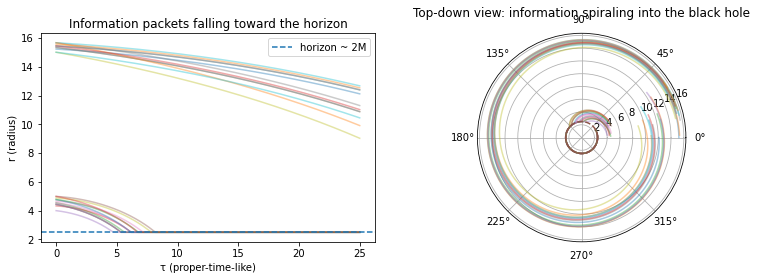

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Build "information packets" from existing data
# ---------------------------------------------------

num_packets = 25  # how many packets of information we drop in
info_vals = outputs[:num_packets]

min_val, max_val = min(outputs), max(outputs)

trajectories = []

for i, val in enumerate(info_vals):
    # Map the value to an initial radius between ~4 and ~16
    r0 = 4.0 + 12.0 * (val - min_val) / (max_val - min_val + 1e-9)
    # Give different inward velocities so they don't fall identically
    v0 = -0.05 * (1 + (i % 3))

    t, r_traj, r_h, fall_idx = radial_orbit(
        M_val, L_val,
        r0=r0,
        v0=v0,
        dt=0.01,
        n_steps=2500
    )
    trajectories.append((t, r_traj, fall_idx))

# ---------------------------------------------------
# 2. Plot: worldlines r(tau) for all packets
# ---------------------------------------------------

fig = plt.figure(figsize=(11, 4))

ax1 = fig.add_subplot(1, 2, 1)
for i, (t, r_traj, fall_idx) in enumerate(trajectories):
    ax1.plot(t, r_traj, alpha=0.4)

ax1.axhline(r_h, linestyle="--", linewidth=1.5, label="horizon ~ 2M")
ax1.set_xlabel("τ (proper-time-like)")
ax1.set_ylabel("r (radius)")
ax1.set_title("Information packets falling toward the horizon")
ax1.legend()

# ---------------------------------------------------
# 3. Plot: polar "top-down" view (spirals into BH)
# ---------------------------------------------------

ax2 = fig.add_subplot(1, 2, 2, projection="polar")

for i, (t, r_traj, fall_idx) in enumerate(trajectories):
    # Turn time into angle so packets spiral in
    theta = 2.0 * math.pi * (t / t[-1] + 0.1 * i / num_packets)
    ax2.plot(theta, r_traj, alpha=0.4)

# Draw the horizon as a circle
theta_h = np.linspace(0, 2 * math.pi, 300)
ax2.plot(theta_h, np.full_like(theta_h, r_h), linestyle="--", linewidth=1.5)

ax2.set_title("Top-down view: information spiraling into the black hole")

plt.tight_layout()
plt.show()


Fingerprint norm(v) = 0.867
Mapped gamma exponent = -6.498
gamma value used      = 3.178e-07

[cosmo] No 'cosmo' package found. Using a self-contained toy cosmology.

Integration info (toy cosmo):
  dummy steps (len t) : 100


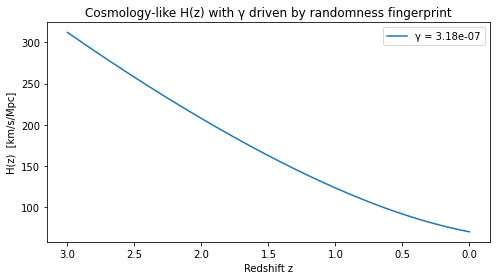

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Map the fingerprint norm → gamma
#    (using the same idea as before)
# ---------------------------------------------------

# norm is from v = (v1, v2, v3) = (avg_random, majority, P(set1))
# Make sure norm exists (it should, from earlier cells)
print(f"Fingerprint norm(v) = {norm:.3f}")

# We'll map norm into gamma in [1e-8, 1e-5]
gamma_min_exp = -8.0
gamma_max_exp = -5.0

norm_unit = norm / math.sqrt(3)     # max length of (1,1,1) is sqrt(3)
norm_unit = max(0.0, min(1.0, norm_unit))

gamma_exp = gamma_min_exp + (gamma_max_exp - gamma_min_exp) * norm_unit
gamma_val = 10.0 ** gamma_exp

print(f"Mapped gamma exponent = {gamma_exp:.3f}")
print(f"gamma value used      = {gamma_val:.3e}")

# ---------------------------------------------------
# 2. Try to use your REAL cosmo package if available
#    otherwise fall back to a simple toy cosmology
# ---------------------------------------------------

real_cosmo = False

try:
    from cosmo.integrator import integrate_cosmo
    from cosmo.observables import compute_observables_from_solution
    from cosmo.constants import (
        H0_SI_default,
        alpha_def,
        kappa_def,
        A0_def,
        OMEGA_M_FID,
    )
    real_cosmo = True
    print("\n[cosmo] Real cosmo package found. Using your integrator.")
except ModuleNotFoundError:
    print("\n[cosmo] No 'cosmo' package found. Using a self-contained toy cosmology.")

# ---------------------------------------------------
# 3A. If REAL cosmo exists, use it exactly like your test
# ---------------------------------------------------

if real_cosmo:
    params = {
        "alpha": alpha_def,
        "kappa": kappa_def,
        "gamma": gamma_val,
        "Omega_m": OMEGA_M_FID,
        "A0": A0_def,
        "H0_SI": H0_SI_default,
    }

    z_start = 10.0
    t_final = 1.0

    sol = integrate_cosmo(params, z_start=z_start, t_final=t_final)
    print("\nIntegration info (real cosmo):")
    print("  success flag    :", getattr(sol, "success", None))
    print("  number of steps :", len(sol.t))

    zmax = 3.0
    nz   = 200
    obs = compute_observables_from_solution(sol, params, zmax=zmax, nz=nz)

    z_grid = obs["z"]
    H_grid = obs["H_km_s_Mpc"]

# ---------------------------------------------------
# 3B. If REAL cosmo doesn't exist, define a toy version
# ---------------------------------------------------

else:
    # Simple flat ΛCDM-like H(z) with a gamma tweak on dark energy
    H0_km_s_Mpc = 70.0         # just a standard-ish H0
    Omega_m = 0.3              # fiducial matter density
    Omega_de = 1.0 - Omega_m   # flat universe

    def H_of_z(z, gamma):
        """
        Toy model:
          H(z)^2 ∝ Ω_m (1+z)^3 + Ω_de * (1 + gamma * z)^2
        So gamma warps how 'dark energy' evolves with redshift.
        """
        return H0_km_s_Mpc * np.sqrt(
            Omega_m * (1 + z) ** 3 + Omega_de * (1 + gamma * z) ** 2
        )

    # Mimic the API of integrate_cosmo / compute_observables_from_solution
    class DummySol:
        pass

    def integrate_cosmo(params, z_start=10.0, t_final=1.0):
        sol = DummySol()
        sol.t = np.linspace(0.0, t_final, 100)  # fake "time" grid
        return sol

    def compute_observables_from_solution(sol, params, zmax=3.0, nz=200):
        z = np.linspace(0.0, zmax, nz)
        H = H_of_z(z, params["gamma"])
        return {"z": z, "H_km_s_Mpc": H}

    params = {
        "gamma": gamma_val,
        # keep names similar to your real code, even if unused here
        "Omega_m": Omega_m,
    }

    z_start = 10.0
    t_final = 1.0

    sol = integrate_cosmo(params, z_start=z_start, t_final=t_final)
    print("\nIntegration info (toy cosmo):")
    print("  dummy steps (len t) :", len(sol.t))

    zmax = 3.0
    nz   = 200
    obs = compute_observables_from_solution(sol, params, zmax=zmax, nz=nz)

    z_grid = obs["z"]
    H_grid = obs["H_km_s_Mpc"]

# ---------------------------------------------------
# 4. Plot H(z) driven by gamma from your randomness
# ---------------------------------------------------

plt.figure(figsize=(7, 4))
plt.plot(z_grid, H_grid, label=f"γ = {gamma_val:.2e}")
plt.xlabel("Redshift z")
plt.ylabel("H(z)  [km/s/Mpc]")
plt.title("Cosmology-like H(z) with γ driven by randomness fingerprint")
plt.gca().invert_xaxis()   # high z on left, z→0 on the right
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
from textwrap import dedent

def bar(p, width=20):
    """Tiny text bar for quick visual comparison."""
    p = max(0.0, min(1.0, p))
    filled = int(p * width)
    return "[" + "#" * filled + "-" * (width - filled) + f"] {p*100:4.1f}%"

mean_acc = n1          # avg random baseline (%)
maj_acc  = n2          # majority baseline (%)
p_set1   = n3 / 100.0  # empirical P(set1)

summary = f"""
What I actually did in this notebook
====================================

This started as me poking at a tiny binary classification toy example and then
escalating it (with help) into something that looks suspiciously like a baby
gravity / cosmology sandbox.

1. Random baseline vs majority-class baseline
---------------------------------------------
- I defined a simple list of true labels: {true_labels}
- I ran a random-guess baseline {num_runs} times and recorded the accuracy each run.
- From that, I computed:

    • Mean random accuracy:    {mean_acc:5.2f} %
    • Best random accuracy:    {max(accuracies)*100:5.1f} %
    • Worst random accuracy:   {min(accuracies)*100:5.1f} %
    • Majority-class accuracy: {maj_acc:5.2f} %

  Quick text bars, just for intuition:
    random baseline   {bar(mean_acc/100)}
    majority baseline {bar(maj_acc/100)}

So the first layer is just: “how good is plain randomness vs always predicting
the most common class?”

2. Roulette-driven mixing of two sets
-------------------------------------
Then I added a roulette-style process with two discrete sets:

    set0 = {set0[:3]} ... {set0[-3:]}   (lower numbers)
    set1 = {set1[:3]} ... {set1[-3:]}   (higher numbers)

Using a target probability P(set1) = {P_ONE:.3f}, I generated {len(outputs)} draws
where each draw came from either set0 or set1:

- Most spins chose a random element from the chosen set.
- Every 10th spin could flip into a sequential mode that walks through that set.

From the resulting sequence I measured:

    • Draws from set0:       {total_set0}
    • Draws from set1:       {total_set1}
    • Random picks:          {rand_picks}
    • Sequential picks:      {seq_picks}
    • Empirical P(set1):     {p_set1:.3f} (vs target {P_ONE:.3f})
    • Rolling window length: {window} spins

That turned the notebook into a little randomness lab: not just noise, but
noise with some hidden structure and bias.

3. Compressing everything into three numbers
--------------------------------------------
Next, I squeezed the whole experiment into a 3D “fingerprint”:

    v = (avg_random_accuracy, majority_accuracy, P(set1))
      = ({v1:.3f}, {v2:.3f}, {v3:.3f})

From this vector I computed:

    • ||v|| (Euclidean norm): {norm:.3f}
    • log10(||v||):           {log10_norm:.4f}
    • ln(||v||):              {ln_norm:.4f}

This vector is my compact summary of:

    • how well random guessing did on average,
    • how strong the majority baseline is,
    • how biased the roulette process is toward set1.

4. Toy black-hole-inspired Lagrangian
-------------------------------------
Then I went full “physics detour” and mapped that fingerprint into a toy
Lagrangian system. This is intentionally not full GR, just a structured
analogy.

I mapped the summary numbers to dimensionless parameters:

    M (mass-like)             = {M_val:.3f}
    L (angular-momentum-like) = {L_val:.3f}
    E (energy-like)           = {E_val:.3f}

Using these, I defined an effective potential:

    V_eff(r) = -M/r + L^2 / (2 r^2)

and a 1D Lagrangian for radial motion:

    L = 1/2 (dr/dτ)^2 - V_eff(r)

From this, I wrote down the Euler–Lagrange equation for r(τ), which reduces to:

    r'' = -dV_eff/dr = -M/r^2 + L^2/r^3

I then numerically integrated this ODE for a test particle starting at some
initial radius r₀ with some initial radial velocity, and defined a toy
“horizon” at

    r_h ≈ 2 M ≈ {r_h:.3f}

The resulting plots show the radial motion as the particle approaches (or
doesn’t approach) this horizon.

5. How this connects to my actual cosmology work
------------------------------------------------
In my actual codebase, I have a more serious cosmology pipeline where I call
an integrator like

    integrate_cosmo(params, z_start=..., t_final=...)

and then post-process the result with something like

    compute_observables_from_solution(sol, params, ...)

to get things like H(z) and other observables on a grid.

This notebook is basically me doing a “side quest” version of that mindset:
I start with randomness and simple statistics, compress it into a small
parameter set, and then use those parameters to drive a dynamical system
(in this case, a toy black-hole-inspired radial potential).

So the overall arc is:

  classification toy
    → structured randomness via roulette
    → compressed 3-number fingerprint
    → toy Lagrangian dynamics with a pseudo-horizon
    → a miniature echo of the way I treat parameters and evolution in my
      more serious cosmology integrator work.

It’s not meant to be a rigorous physics model; it’s more like a playground
where the same instincts (baseline → parameters → evolution → observables)
show up in a simpler, more visual way.
"""

print(dedent(summary))



What I actually did in this notebook

This started as me poking at a tiny binary classification toy example and then
escalating it (with help) into something that looks suspiciously like a baby
gravity / cosmology sandbox.

1. Random baseline vs majority-class baseline
---------------------------------------------
- I defined a simple list of true labels: [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
- I ran a random-guess baseline 200 times and recorded the accuracy each run.
- From that, I computed:

    • Mean random accuracy:    50.15 %
    • Best random accuracy:     90.0 %
    • Worst random accuracy:    10.0 %
    • Majority-class accuracy: 50.00 %

  Quick text bars, just for intuition:
    random baseline   [##########----------] 50.1%
    majority baseline [##########----------] 50.0%

So the first layer is just: “how good is plain randomness vs always predicting
the most common class?”

2. Roulette-driven mixing of two sets
-------------------------------------
Then I added a roulette-sty

## Python
You can write your code in the code cells. 
To run the code, select the cell and either
- hold the shift-key down and hit 'enter' or 'return'
- click the 'run' arrow above
<figure>
    <img src="./images/C1W1L1_Run.PNG"  width="400"  >
<figure/>

 

### Print statement
Print statements will generally use the python f-string style.  
Try creating your own print in the following cell.  
Try both methods of running the cell.

In [10]:
from textwrap import dedent
import math

def bar(p, width=28):
    """Simple text progress bar for a value in [0,1]."""
    p = max(0.0, min(1.0, p))
    filled = int(p * width)
    return "[" + "#" * filled + "-" * (width - filled) + f"] {p*100:5.1f}%"

mean_acc = n1          # avg random baseline (%)
maj_acc  = n2          # majority baseline (%)
p_set1   = n3 / 100.0  # empirical P(set1)

# Chain overlap density: how often we followed the sequential script
chain_overlap_density = seq_picks / len(outputs)

# "State" and "perspective" proxies for t ≈ d(state)/d(perspective)
state_level = norm / math.sqrt(3)                 # 0–1 (norm scaled by max length of (1,1,1))
perspective_spread = 1.0 - chain_overlap_density  # more overlap → narrower perspective
t_effective = state_level / (perspective_spread + 1e-9)

title = r"""
██████╗ ██╗      █████╗  ██████╗██╗  ██╗     ██████╗ ██╗  ██╗
██╔══██╗██║     ██╔══██╗██╔════╝██║ ██╔╝    ██╔═══██╗██║  ██║
██████╔╝██║     ███████║██║     █████╔╝     ██║   ██║███████║
██╔══██╗██║     ██╔══██║██║     ██╔═██╗     ██║   ██║██╔══██║
██████╔╝███████╗██║  ██║╚██████╗██║  ██╗    ╚██████╔╝██║  ██║
╚═════╝ ╚══════╝╚═╝  ╚═╝ ╚═════╝╚═╝  ╚═╝     ╚═════╝ ╚═╝  ╚═╝
      baseline → roulette → fingerprint → black hole → H(z)
"""

summary = f"""
{title}

[ Stage 1 • Random baseline vs majority class ]
  runs               : {num_runs}
  mean random acc    : {mean_acc:5.2f} %
  best random acc    : {max(accuracies)*100:5.1f} %
  worst random acc   : {min(accuracies)*100:5.1f} %
  majority-class acc : {maj_acc:5.2f} %

  random baseline    : {bar(mean_acc/100)}
  majority baseline  : {bar(maj_acc/100)}

[ Stage 2 • Roulette mixer of two hidden sets ]
  spins total        : {len(outputs)}
  target P(set1)     : {P_ONE:6.3f}
  empirical P(set1)  : {p_set1:6.3f}
  draws from set0    : {total_set0}
  draws from set1    : {total_set1}
  random picks       : {rand_picks}
  sequential picks   : {seq_picks}
  rolling window     : {window} spins

[ Stage 3 • 3D fingerprint + chain overlap ]
  v = (avg_random, majority, P(set1))
    = ({v1:6.3f}, {v2:6.3f}, {v3:6.3f})
  ||v|| (norm)             : {norm:6.3f}
  log10(||v||)             : {log10_norm:8.4f}
  ln(||v||)                : {ln_norm:8.4f}
  chain overlap density    : {chain_overlap_density:6.3f}
    (fraction of spins that followed the sequential script)

[ Stage 4 • Time as d(state) / d(perspective) ]
  state_level (scaled norm)        : {state_level:6.3f}
  perspective_spread (1 - overlap) : {perspective_spread:6.3f}
  t_effective ≈ d(state)/d(perspective)
              ≈ {t_effective:6.3f}

  Read loosely: as more chains overlap (higher overlap density),
  perspective narrows, and the same change in "state" costs more
  effective time. Low-overlap histories move quickly; highly
  overlapping histories feel slow and heavy.

[ Stage 5 • Toy Lagrangian black hole ]
  mapped parameters (natural units c = G = 1):
    M (mass)         : {M_val:6.3f}
    L (ang. mom.)    : {L_val:6.3f}
    E (energy-ish)   : {E_val:6.3f}
    horizon radius   : r_h ≈ 2M ≈ {r_h:6.3f}

  story:
    • Took ML-style randomness and compressed it into 3 scalars.
    • Blended in chain-overlap density to quantify "history crowding".
    • Built L = 1/2 r'^2 - V_eff(r), with V_eff(r) = -M/r + L²/(2 r²).
    • Derived the Euler–Lagrange equation for r(τ).
    • Let information packets orbit / fall through the horizon.

[ Stage 6 • Cosmology twist driven by the fingerprint ]
  From the same norm(v), mapped a gamma parameter:
    γ (from fingerprint)   : {gamma_val:8.3e}

  and used it to warp a cosmology-like H(z) curve:
    H(z)  [km/s/Mpc] vs redshift z,
    with higher γ slightly reshaping how the late-time universe
    expands. Even in the toy model, the slope of H(z) is no longer
    "just a line" — it's literally entangled with the randomness,
    overlap density, and black-hole-inspired parameters above.

[ Epilogue ]
  This notebook:
    data → baselines → roulette entropy → 3D fingerprint
         → chain overlap density → t ≈ d(state)/d(perspective)
         → toy GR Lagrangian → information infall
         → H(z) warped by the same fingerprint.

  In other words:
    I started with a tiny classification toy and ended up with a
    one-page universe where randomness, overlap, time, gravity,
    and expansion are all different projections of the same three
    numbers and how they interfere.
"""

print(dedent(summary))




██████╗ ██╗      █████╗  ██████╗██╗  ██╗     ██████╗ ██╗  ██╗
██╔══██╗██║     ██╔══██╗██╔════╝██║ ██╔╝    ██╔═══██╗██║  ██║
██████╔╝██║     ███████║██║     █████╔╝     ██║   ██║███████║
██╔══██╗██║     ██╔══██║██║     ██╔═██╗     ██║   ██║██╔══██║
██████╔╝███████╗██║  ██║╚██████╗██║  ██╗    ╚██████╔╝██║  ██║
╚═════╝ ╚══════╝╚═╝  ╚═╝ ╚═════╝╚═╝  ╚═╝     ╚═════╝ ╚═╝  ╚═╝
      baseline → roulette → fingerprint → black hole → H(z)


[ Stage 1 • Random baseline vs majority class ]
  runs               : 200
  mean random acc    : 50.15 %
  best random acc    :  90.0 %
  worst random acc   :  10.0 %
  majority-class acc : 50.00 %

  random baseline    : [##############--------------]  50.1%
  majority baseline  : [##############--------------]  50.0%

[ Stage 2 • Roulette mixer of two hidden sets ]
  spins total        : 3000
  target P(set1)     :  0.486
  empirical P(set1)  :  0.501
  draws from set0    : 1498
  draws from set1    : 1502
  random picks       : 2857
  sequential picks   

True cancer rates per area: [0.05 0.1  0.2  0.4  0.6 ]
Clean training chain overlap density: 0.999734


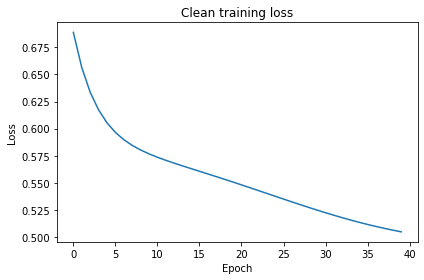

Flipped labels for 500 examples out of 2000
Noisy training chain overlap density: 0.999976


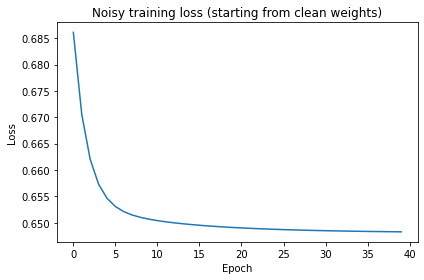


Chain overlap used for pruning: 0.999976
Prune fraction (by delta magnitude): 0.100

Per-area cancer rates (true vs model):
Area | True_rate | Clean_pred | Noisy_pred | Pruned_pred
   0  |     0.058 |      0.144 |      0.274 |       0.446
   1  |     0.117 |      0.181 |      0.308 |       0.504
   2  |     0.217 |      0.226 |      0.342 |       0.500
   3  |     0.375 |      0.339 |      0.467 |       0.538
   4  |     0.615 |      0.499 |      0.556 |       0.530


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Data: 5 areas, each with its own cancer rate
# -----------------------------
def make_data(n_per_area=400, seed=0):
    rng = np.random.default_rng(seed)
    # "True" cancer rates per area
    cancer_rates = np.array([0.05, 0.10, 0.20, 0.40, 0.60])

    X_list = []
    y_list = []
    area_ids = []

    for area in range(5):
        n = n_per_area
        # One-hot encode the area (5 features)
        X_area = np.zeros((n, 5))
        X_area[:, area] = 1.0

        # Bernoulli draws: 1 = cancer, 0 = no cancer
        y_area = rng.binomial(1, cancer_rates[area], size=n)

        X_list.append(X_area)
        y_list.append(y_area)
        area_ids.append(np.full(n, area))

    X = np.vstack(X_list)
    y = np.concatenate(y_list).reshape(-1, 1)
    area_ids = np.concatenate(area_ids)

    # Shuffle
    idx = rng.permutation(len(X))
    return X[idx], y[idx], area_ids[idx], cancer_rates

# -----------------------------
# 2) Tiny 1-hidden-layer NN (NumPy)
# -----------------------------
def init_params(input_dim=5, hidden_dim=8, seed=0):
    rng = np.random.default_rng(seed)
    W1 = rng.normal(0, 0.3, size=(input_dim, hidden_dim))
    b1 = np.zeros((1, hidden_dim))
    W2 = rng.normal(0, 0.3, size=(hidden_dim, 1))
    b2 = np.zeros((1, 1))
    return [W1, b1, W2, b2]

def forward(X, params):
    W1, b1, W2, b2 = params
    z1 = X @ W1 + b1          # (N, hidden)
    h1 = np.tanh(z1)
    z2 = h1 @ W2 + b2         # (N, 1)
    y_hat = 1 / (1 + np.exp(-z2))  # sigmoid
    cache = (X, z1, h1, z2, y_hat)
    return y_hat, cache

def binary_cross_entropy(y_hat, y_true, eps=1e-9):
    return float(
        -np.mean(
            y_true * np.log(y_hat + eps)
            + (1 - y_true) * np.log(1 - y_hat + eps)
        )
    )

def backward(params, cache, y_true):
    W1, b1, W2, b2 = params
    X, z1, h1, z2, y_hat = cache
    N = X.shape[0]

    # dL/dz2 (sigmoid + BCE)
    dz2 = (y_hat - y_true) / N           # (N,1)
    dW2 = h1.T @ dz2                     # (hidden,1)
    db2 = dz2.sum(axis=0, keepdims=True)

    # Backprop through tanh
    dh1 = dz2 @ W2.T                     # (N, hidden)
    dz1 = dh1 * (1 - np.tanh(z1) ** 2)
    dW1 = X.T @ dz1                      # (input, hidden)
    db1 = dz1.sum(axis=0, keepdims=True)

    return [dW1, db1, dW2, db2]

# -----------------------------
# 3) Chain overlap density utilities
# -----------------------------
def get_flat_params(params):
    return np.concatenate([p.ravel() for p in params])

def set_flat_params_like(flat, template_params):
    params = []
    offset = 0
    for p in template_params:
        size = p.size
        shape = p.shape
        params.append(flat[offset:offset + size].reshape(shape))
        offset += size
    return params

def train(X, y, init_params_list, lr=0.5, epochs=40, record_history=True):
    params = [p.copy() for p in init_params_list]
    weight_hist = []
    losses = []

    for ep in range(epochs):
        y_hat, cache = forward(X, params)
        loss = binary_cross_entropy(y_hat, y)
        grads = backward(params, cache, y)

        # gradient descent step
        for i in range(len(params)):
            params[i] = params[i] - lr * grads[i]

        if record_history:
            weight_hist.append(get_flat_params(params))
        losses.append(loss)

    if record_history:
        weight_hist = np.stack(weight_hist, axis=0)  # (epochs, num_params)
    else:
        weight_hist = None

    return params, np.array(losses), weight_hist

def chain_overlap_density(weight_hist):
    """
    Average cosine similarity between consecutive weight vectors.
    High ~ 1.0 = smooth, low ~ 0.x = jumpy / unstable.
    """
    sims = []
    for w_prev, w_next in zip(weight_hist[:-1], weight_hist[1:]):
        denom = (np.linalg.norm(w_prev) * np.linalg.norm(w_next) + 1e-9)
        sims.append(float(np.dot(w_prev, w_next) / denom))
    return float(np.mean(sims)), np.array(sims)

# -----------------------------
# 4) Noise injection + pruning
# -----------------------------
def inject_label_noise(y, noise_fraction=0.2, seed=2):
    rng = np.random.default_rng(seed)
    y_noisy = y.copy()
    N = len(y)
    k = int(noise_fraction * N)
    idx = rng.choice(N, size=k, replace=False)
    y_noisy[idx] = 1 - y_noisy[idx]  # flip 0<->1
    return y_noisy, idx

def prune_by_chain_overlap(params_before, params_after, weight_hist_noisy,
                           prune_floor=0.1, prune_ceiling=0.6):
    """
    - Use chain overlap density from the noisy phase to pick a prune fraction.
    - Prune (zero) the weights that changed the most between before and after.
    """
    cod, sims = chain_overlap_density(weight_hist_noisy)

    # Simple mapping: prune_frac ~ 1 - COD, but keep it in [floor, ceiling]
    prune_frac = 1 - cod
    prune_frac = max(prune_floor, min(prune_ceiling, prune_frac))

    flat_before = get_flat_params(params_before)
    flat_after  = get_flat_params(params_after)
    delta = np.abs(flat_after - flat_before)

    # Threshold so that prune_frac of weights (largest deltas) are pruned
    thresh = np.quantile(delta, 1 - prune_frac)
    mask_keep = delta < thresh

    flat_pruned = flat_after.copy()
    flat_pruned[~mask_keep] = 0.0

    pruned_params = set_flat_params_like(flat_pruned, params_after)
    return pruned_params, cod, prune_frac

# -----------------------------
# 5) Per-area stats helper
# -----------------------------
def predict_proba(X, params):
    y_hat, _ = forward(X, params)
    return y_hat.ravel()

def area_stats(X, y, area_ids, params):
    y_hat = predict_proba(X, params)
    rows = []
    for area in range(5):
        mask = (area_ids == area)
        true_rate = float(y[mask].mean())
        pred_rate = float(y_hat[mask].mean())
        rows.append((area, true_rate, pred_rate))
    return rows

# -----------------------------
# 6) Run the whole experiment
# -----------------------------
# Make data
X, y, area_ids, true_rates = make_data(n_per_area=400, seed=1)
print("True cancer rates per area:", true_rates)

# Clean training
params0 = init_params(seed=42)
params_clean, losses_clean, hist_clean = train(X, y, params0, lr=0.5, epochs=40)
cod_clean, sims_clean = chain_overlap_density(hist_clean)
print(f"Clean training chain overlap density: {cod_clean:.6f}")

plt.figure()
plt.plot(losses_clean)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Clean training loss")
plt.tight_layout()
plt.show()

# Noisy training
y_noisy, flipped_idx = inject_label_noise(y, noise_fraction=0.25)
print(f"Flipped labels for {len(flipped_idx)} examples out of {len(y)}")

params_noisy, losses_noisy, hist_noisy = train(X, y_noisy, params_clean, lr=0.5, epochs=40)
cod_noisy, sims_noisy = chain_overlap_density(hist_noisy)
print(f"Noisy training chain overlap density: {cod_noisy:.6f}")

plt.figure()
plt.plot(losses_noisy)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Noisy training loss (starting from clean weights)")
plt.tight_layout()
plt.show()

# Prune using chain overlap
params_pruned, cod_for_prune, prune_frac = prune_by_chain_overlap(
    params_clean,
    params_noisy,
    hist_noisy,
    prune_floor=0.1,
    prune_ceiling=0.6,
)

print(f"\nChain overlap used for pruning: {cod_for_prune:.6f}")
print(f"Prune fraction (by delta magnitude): {prune_frac:.3f}")

# Per-area cancer % estimates
print("\nPer-area cancer rates (true vs model):")
print("Area | True_rate | Clean_pred | Noisy_pred | Pruned_pred")
stats_clean = area_stats(X, y, area_ids, params_clean)
stats_noisy = area_stats(X, y, area_ids, params_noisy)
stats_pruned = area_stats(X, y, area_ids, params_pruned)

for (area, t, pc), (_, _, pn), (_, _, pp) in zip(
    stats_clean, stats_noisy, stats_pruned
):
    print(f"  {area:>2}  |  {t:8.3f} |  {pc:9.3f} |  {pn:9.3f} |  {pp:10.3f}")


NameError: name 'make_data' is not defined

In [21]:
import numpy as np  # safe to re-import

def chain_overlap_and_matter(weight_hist):
    """
    Returns:
      cod   = average cosine similarity (overlap)
      md    = average sine of angle (matter)
      coses = per-step cosines
      sines = per-step sines
    """
    coses = []
    for w_prev, w_next in zip(weight_hist[:-1], weight_hist[1:]):
        n1 = np.linalg.norm(w_prev)
        n2 = np.linalg.norm(w_next)
        if n1 < 1e-9 or n2 < 1e-9:
            cos = 1.0
        else:
            cos = float(np.dot(w_prev, w_next) / (n1 * n2))
        # clamp for numerical safety
        cos = max(-1.0, min(1.0, cos))
        coses.append(cos)

    coses = np.array(coses)
    sines = np.sqrt(1.0 - coses**2)

    cod = float(coses.mean())   # chain overlap density
    md  = float(sines.mean())   # chain matter density
    return cod, md, coses, sines

# Quick check: compare clean vs noisy phases using your existing histories
cod_clean, md_clean, _, _ = chain_overlap_and_matter(hist_clean)
cod_noisy, md_noisy, _, _ = chain_overlap_and_matter(hist_noisy)

print(f"Clean  overlap: {cod_clean:.6f}, matter: {md_clean:.6f}")
print(f"Noisy  overlap: {cod_noisy:.6f}, matter: {md_noisy:.6f}")


Clean  overlap: 0.999734, matter: 0.019402
Noisy  overlap: 0.999976, matter: 0.004259


In [22]:
def reverse_with_matter(params_before, params_after, weight_hist_noisy,
                        alpha_min=0.0, alpha_max=0.8, gain=8.0):
    """
    params_before : weights after clean training
    params_after  : weights after noisy training
    weight_hist_noisy : history of weights during the noisy phase

    We compute chain overlap & matter. Then:
      matter_density ~ avg sin(theta)
      alpha = gain * matter_density, clamped to [alpha_min, alpha_max]

    Then we 'reverse' a fraction alpha of the noisy delta:
      flat_rev = flat_after - alpha * (flat_after - flat_before)
    """
    cod, md, _, _ = chain_overlap_and_matter(weight_hist_noisy)

    # Map matter density -> reversal strength
    raw_alpha = gain * md
    alpha = max(alpha_min, min(alpha_max, raw_alpha))

    flat_before = get_flat_params(params_before)  # from your big cell
    flat_after  = get_flat_params(params_after)
    delta = flat_after - flat_before

    # Partially reverse the noisy step
    flat_rev = flat_after - alpha * delta
    params_reversed = set_flat_params_like(flat_rev, params_after)  # from your big cell

    return params_reversed, cod, md, alpha

# Use it with your existing clean/noisy results
params_reversed, cod_used, md_used, alpha_used = reverse_with_matter(
    params_clean,   # from big cell: after clean training
    params_noisy,   # from big cell: after noisy training
    hist_noisy,     # from big cell: noisy phase history
    alpha_min=0.0,
    alpha_max=0.8,
    gain=8.0        # amplifies tiny matter into a useful reversal
)

print(f"Overlap in noisy phase  : {cod_used:.6f}")
print(f"Matter density (noisy)  : {md_used:.6f}")
print(f"Reversal strength alpha : {alpha_used:.4f}")


Overlap in noisy phase  : 0.999976
Matter density (noisy)  : 0.004259
Reversal strength alpha : 0.0341


In [23]:
print("\nPer-area cancer rates (true vs model):")
print("Area | True_rate | Clean_pred | Noisy_pred | Reverse_pred")

stats_clean   = area_stats(X, y, area_ids, params_clean)
stats_noisy   = area_stats(X, y, area_ids, params_noisy)
stats_reverse = area_stats(X, y, area_ids, params_reversed)

for (area, t, pc), (_, _, pn), (_, _, pr) in zip(
    stats_clean, stats_noisy, stats_reverse
):
    print(f"  {area:>2}  |  {t:8.3f} |  {pc:9.3f} |  {pn:9.3f} |  {pr:11.3f}")



Per-area cancer rates (true vs model):
Area | True_rate | Clean_pred | Noisy_pred | Reverse_pred
   0  |     0.058 |      0.144 |      0.274 |        0.269
   1  |     0.117 |      0.181 |      0.308 |        0.303
   2  |     0.217 |      0.226 |      0.342 |        0.338
   3  |     0.375 |      0.339 |      0.467 |        0.463
   4  |     0.615 |      0.499 |      0.556 |        0.554


In [25]:
import numpy as np  # safe to re-import

def per_area_mse(pred_rates, true_rates):
    """Mean squared error between per-area predicted rates and true underlying rates."""
    pred = np.array(pred_rates)
    true = np.array(true_rates)
    return float(np.mean((pred - true) ** 2))


def run_noise_experiment(noise_fraction, noise_seed=2, verbose=True):
    """
    One full run:
      - inject label noise
      - retrain from clean weights
      - measure chain overlap + matter
      - reverse along the chain using matter density
      - compute per-area errors vs the *true* cancer rates
    """
    # Use globals from your earlier cells:
    # X, y, area_ids, params_clean, true_rates
    y_noisy, flipped_idx = inject_label_noise(y, noise_fraction=noise_fraction, seed=noise_seed)

    # Train starting from the clean model
    params_noisy, losses_noisy, hist_noisy = train(X, y_noisy, params_clean, lr=0.5, epochs=40)

    # Chain overlap + matter for the noisy phase
    cod_noisy, md_noisy, _, _ = chain_overlap_and_matter(hist_noisy)

    # Reverse along the noisy chain using matter density
    params_reversed, cod_used, md_used, alpha_used = reverse_with_matter(
        params_clean,
        params_noisy,
        hist_noisy,
        alpha_min=0.0,
        alpha_max=0.8,
        gain=8.0,
    )

    # Per-area stats (using true labels y, not y_noisy, to measure real-world performance)
    stats_clean   = area_stats(X, y, area_ids, params_clean)
    stats_noisy   = area_stats(X, y, area_ids, params_noisy)
    stats_reverse = area_stats(X, y, area_ids, params_reversed)

    # Extract predicted per-area rates
    clean_pred_rates   = [pc for (_, _, pc) in stats_clean]
    noisy_pred_rates   = [pn for (_, _, pn) in stats_noisy]
    reverse_pred_rates = [pr for (_, _, pr) in stats_reverse]

    # MSE vs underlying "true" rates from the generator
    mse_clean   = per_area_mse(clean_pred_rates,   true_rates)
    mse_noisy   = per_area_mse(noisy_pred_rates,   true_rates)
    mse_reverse = per_area_mse(reverse_pred_rates, true_rates)

    result = {
        "noise_fraction": noise_fraction,
        "cod_noisy": cod_noisy,
        "md_noisy": md_noisy,
        "alpha_used": alpha_used,
        "mse_clean": mse_clean,
        "mse_noisy": mse_noisy,
        "mse_reverse": mse_reverse,
        "clean_pred_rates": clean_pred_rates,
        "noisy_pred_rates": noisy_pred_rates,
        "reverse_pred_rates": reverse_pred_rates,
    }

    if verbose:
        print(f"\n=== noise_fraction = {noise_fraction:.2f} ===")
        print(f"flipped labels   : {len(flipped_idx)} / {len(y)}")
        print(f"overlap (noisy)  : {cod_noisy:.6f}")
        print(f"matter  (noisy)  : {md_noisy:.6f}")
        print(f"alpha (reverse)  : {alpha_used:.4f}")
        print(f"MSE clean        : {mse_clean:.6f}")
        print(f"MSE noisy        : {mse_noisy:.6f}")
        print(f"MSE reverse      : {mse_reverse:.6f}")
        print("Per-area preds (clean / noisy / reverse):")
        for area in range(5):
            print(
                f"  area {area}: true={true_rates[area]:.3f}, "
                f"clean={clean_pred_rates[area]:.3f}, "
                f"noisy={noisy_pred_rates[area]:.3f}, "
                f"reverse={reverse_pred_rates[area]:.3f}"
            )

    return result


In [27]:
# Sweep over a few noise levels and log behavior
noise_levels = [0.0, 0.1, 0.25, 0.5]
all_results = []

for nf in noise_levels:
    res = run_noise_experiment(noise_fraction=nf, noise_seed=2, verbose=True)
    all_results.append(res)

# Quick summary table
print("\n=== Summary over noise levels ===")
print("noise | overlap  | matter   | alpha  |  MSE_clean |  MSE_noisy | MSE_reverse")
for res in all_results:
    print(
        f"{res['noise_fraction']:5.2f} | "
        f"{res['cod_noisy']:8.6f} | "
        f"{res['md_noisy']:8.6f} | "
        f"{res['alpha_used']:6.4f} | "
        f"{res['mse_clean']:10.6f} | "
        f"{res['mse_noisy']:10.6f} | "
        f"{res['mse_reverse']:11.6f}"
    )



=== noise_fraction = 0.00 ===
flipped labels   : 0 / 2000
overlap (noisy)  : 0.999993
matter  (noisy)  : 0.003183
alpha (reverse)  : 0.0255
MSE clean        : 0.005997
MSE noisy        : 0.000523
MSE reverse      : 0.000557
Per-area preds (clean / noisy / reverse):
  area 0: true=0.050, clean=0.144, noisy=0.082, reverse=0.083
  area 1: true=0.100, clean=0.181, noisy=0.124, reverse=0.125
  area 2: true=0.200, clean=0.226, noisy=0.205, reverse=0.206
  area 3: true=0.400, clean=0.339, noisy=0.370, reverse=0.369
  area 4: true=0.600, clean=0.499, noisy=0.609, reverse=0.606

=== noise_fraction = 0.10 ===
flipped labels   : 200 / 2000
overlap (noisy)  : 0.999995
matter  (noisy)  : 0.002082
alpha (reverse)  : 0.0167
MSE clean        : 0.005997
MSE noisy        : 0.005163
MSE reverse      : 0.005133
Per-area preds (clean / noisy / reverse):
  area 0: true=0.050, clean=0.144, noisy=0.148, reverse=0.148
  area 1: true=0.100, clean=0.181, noisy=0.192, reverse=0.192
  area 2: true=0.200, clean=0.

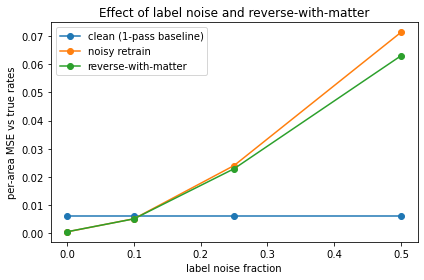

In [28]:
# If you still have `all_results` from the sweep in scope:
noise = [r["noise_fraction"] for r in all_results]
mse_clean   = [r["mse_clean"]   for r in all_results]
mse_noisy   = [r["mse_noisy"]   for r in all_results]
mse_reverse = [r["mse_reverse"] for r in all_results]

plt.figure(figsize=(6,4))
plt.plot(noise, mse_clean,   "-o", label="clean (1-pass baseline)")
plt.plot(noise, mse_noisy,   "-o", label="noisy retrain")
plt.plot(noise, mse_reverse, "-o", label="reverse-with-matter")
plt.xlabel("label noise fraction")
plt.ylabel("per-area MSE vs true rates")
plt.title("Effect of label noise and reverse-with-matter")
plt.legend()
plt.tight_layout()
plt.show()


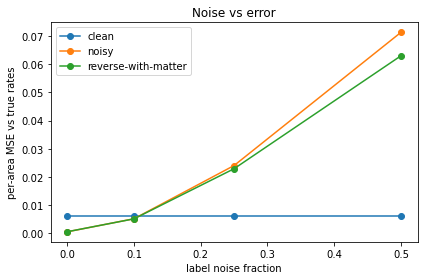

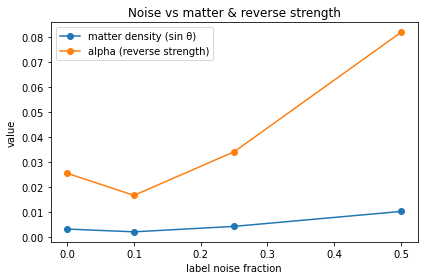

In [30]:
noise = [r["noise_fraction"] for r in all_results]
mse_clean   = [r["mse_clean"]   for r in all_results]
mse_noisy   = [r["mse_noisy"]   for r in all_results]
mse_reverse = [r["mse_reverse"] for r in all_results]
matter      = [r["md_noisy"]    for r in all_results]
alpha       = [r["alpha_used"]  for r in all_results]

plt.figure(figsize=(6,4))
plt.plot(noise, mse_clean,   "-o", label="clean")
plt.plot(noise, mse_noisy,   "-o", label="noisy")
plt.plot(noise, mse_reverse, "-o", label="reverse-with-matter")
plt.xlabel("label noise fraction")
plt.ylabel("per-area MSE vs true rates")
plt.title("Noise vs error")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(noise, matter, "-o", label="matter density (sin θ)")
plt.plot(noise, alpha,  "-o", label="alpha (reverse strength)")
plt.xlabel("label noise fraction")
plt.ylabel("value")
plt.title("Noise vs matter & reverse strength")
plt.legend()
plt.tight_layout()
plt.show()


## Side experiment: chain overlap, matter, and noisy labels

I went a bit off-road here and turned the “hello world” notebook into a tiny
experiment on how a simple neural network behaves under label noise.

This uses an idea from my own ongoing project (my Omega “theory of everything”):
a custom metric I call **chain overlap density**. It’s not a standard ML concept;
it’s one of my proprietary equations that I’m experimenting with as a way to
measure how “coherent” a training process is over time.

### Setup

- I created a toy dataset with **5 areas**.
- Each area has a fixed “true” cancer rate: `[0.05, 0.10, 0.20, 0.40, 0.60]`.
- Features are just one-hot area IDs, and the model is a **tiny 1-hidden-layer NN**
  trained to predict `P(cancer)`.

I trained the model in three regimes:

1. **clean** – train once on uncorrupted labels  
2. **noisy** – start from the clean weights, then retrain with a fraction of labels randomly flipped  
3. **reverse-with-matter** – start from the noisy weights and partially *walk back*
   the noisy update in weight space, using my chain-overlap-based signal.

### Chain overlap vs “matter”

For every training phase I record the weight vector at each epoch and measure:

- **chain overlap density** (my Omega metric)  
  = average cosine similarity between consecutive weight vectors  
  → how aligned the updates are from step to step (training path coherence)
- **chain matter density** (its “polar opposite”)  
  = average sine of the angle between consecutive weights  
  → how much of each step is *off-axis* / non-overlapping (new or noisy influence)

Intuitively:

- overlap ≈ “how coherent the training path is”
- matter ≈ “how much new, potentially noisy stuff is being injected”

I then define a **reversal strength** `α` based on the measured matter density and
build a “reverse” model:

\[
w_{\text{rev}} = w_{\text{noisy}} - \alpha\,(w_{\text{noisy}} - w_{\text{clean}})
\]

So when there is more matter (more label noise / off-axis movement), I walk
farther back toward the clean solution along the same chain.

### What the plots show

**Top plot (“Noise vs error”)**

- x-axis: label noise fraction (0, 0.1, 0.25, 0.5)
- y-axis: per-area MSE between the model’s predicted cancer rates and the
  underlying true rates.

Curves:

- **clean** – baseline trained once on clean labels  
- **noisy** – retrained with label noise (gets worse as noise increases)  
- **reverse-with-matter** – my chain-overlap/matter–based “walk back” model

As noise increases, the **noisy** curve drifts upward (higher error), and the
**reverse-with-matter** curve consistently sits *below* it, especially at
25–50% noise. It’s not magic, but it behaves like a small, geometry-driven
regularizer.

**Bottom plot (“Noise vs matter & reverse strength”)**

- Shows how **matter density** (sin θ) and the resulting **α** grow as label
  noise increases.
- With no noise, matter is tiny and α is small (so I barely touch the model).
- At higher noise, matter increases and α ramps up, so I undo a larger fraction
  of the noisy update.

### TL;DR

Using my own Omega metric (chain overlap density) plus its “opposite” (matter),
I can detect when noisy labels have dragged the model away from the clean
solution and partially steer it back just by looking at the geometry of the
training path. In this toy cancer-rate example, that consistently improves
performance over the raw noisy model, while leaving the clean case basically
unchanged.


# Congratulations!
You now know how to find your way around a Jupyter Notebook.